In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from scipy.linalg import eigh_tridiagonal
#from IPython.display import HTML

In [11]:
# Define parameters
N = 3000   
dx = 1/N
dt = 1e-7
x = np.linspace(0, 1, N)
#psi_0 = np.exp(-(x - 0.5)**2 / (2*0.05**2)) # initial wave-function - gaussian
psi_0 = np.sqrt(2)*np.sin(np.pi*x)
#psi_0 = np.exp(-(x-0.5)**2 / (2*0.02**2))
hbar = 1.05e-34   # Plank's constant
m = 9.11e-31   # mass of electron 
L = 0.512e-10  # radius of atom

Давайте определим произвольный потенциал, пусть он будет в виде перевёрнутого гауссиана:
$$V(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{\frac{(x-\mu)^2}{2\sigma^2}}$$

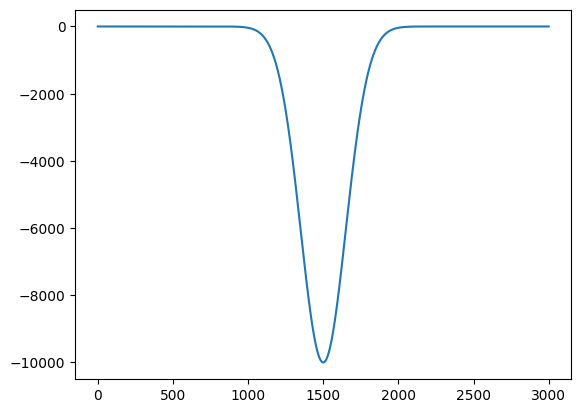

In [12]:
def potential(x_):      # this is mL^2*V dimentionless potential
    mu = 1/2
    sigma = 1/20
    L = 1
    return -1e4 * np.exp(-(x - mu*L)**2 / (2*(sigma*L)**2))
    #return 0*x
plt.plot(potential(x))

In [13]:
# Solving for eigenstates of the time-independent S. equation
d = 1/dx**2 + potential(x)[1:-1] # don't take the first and last point
e = -1/(2*dx**2) * np.ones(len(d) - 1)
np.shape(d)

(2998,)

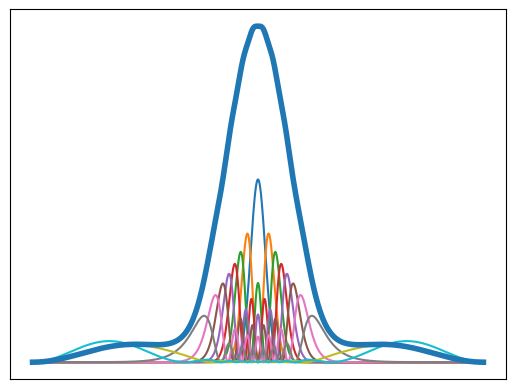

In [14]:
d = 1/dx**2 + potential(x)[1:-1] 
e = -1/(2*dx**2) * np.ones(len(d) - 1)
w, v = eigh_tridiagonal(d, e)   
plt.plot(np.abs(v.T[0])**2)
plt.plot(np.abs(v.T[1])**2)
plt.plot(np.abs(v.T[2])**2)
plt.plot(np.abs(v.T[3])**2)
plt.plot(np.abs(v.T[4])**2)
plt.plot(np.abs(v.T[5])**2)
plt.plot(np.abs(v.T[6])**2)
plt.plot(np.abs(v.T[7])**2)
plt.plot(np.abs(v.T[8])**2)
plt.plot(np.abs(v.T[9])**2)
plt.plot(np.abs(v.T[0])**2 + np.abs(v.T[1])**2 + np.abs(v.T[2])**2 + np.abs(v.T[3])**2 + np.abs(v.T[4])**2 + np.abs(v.T[5])**2 + np.abs(v.T[6])**2 + np.abs(v.T[7])**2 + np.abs(v.T[8])**2, linewidth=4)
#plt.plot(np.abs(v.T[1])**2)
#plt.plot(np.abs(v.T[2])**2)
#plt.plot(np.abs(v.T[3])**2)
plt.xticks([])
plt.yticks([])
plt.savefig('foo.png', dpi=1000)

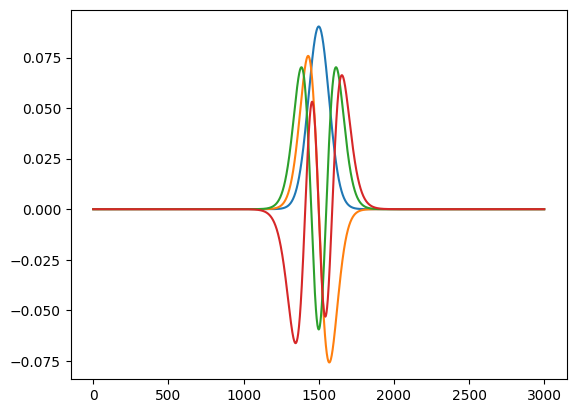

In [15]:
E_j = w[0:N-3]   # we take all (some - 100 is enough) eigenenergies for the total wavepacket
 # creating a wavepacket, which is an infinite sum of dot products
psi_j = np.pad(v.T[0:N-3], [(0, 0), (1, 1)], mode='constant')    # pad an array - заполнение массива, на краях (0, 0), (1, 1) добавляем нули
c_j = np.dot(psi_j, psi_0)   
plt.plot(psi_j[0])
plt.plot(psi_j[1])
plt.plot(psi_j[2])
plt.plot(psi_j[3])

In [16]:
def psi_x(t):                                    # @ is a typical operator for matrix multiplication
    return psi_j.T @ (c_j*np.exp(-1j*E_j*t))     # you can put ‘j’ after a number to make it imaginary

In [17]:
def animate(i):
    func.set_data(x, np.abs(psi_x(100*i*dt)) ** 2)
    #time_text.set_text("$t' = $" + "{:.1f}".format(100*i*dt*1e4))
    real_time_text.set_text("$t = $" + "{:.1f}".format(100*i*dt*(10e15*m*L**2/hbar)*1e4) + "$\dot 10^{-15}$ сек")

/tmp/ipykernel_5731/1444862532.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, potential(x), 'b--', color='gray', linewidth=4)


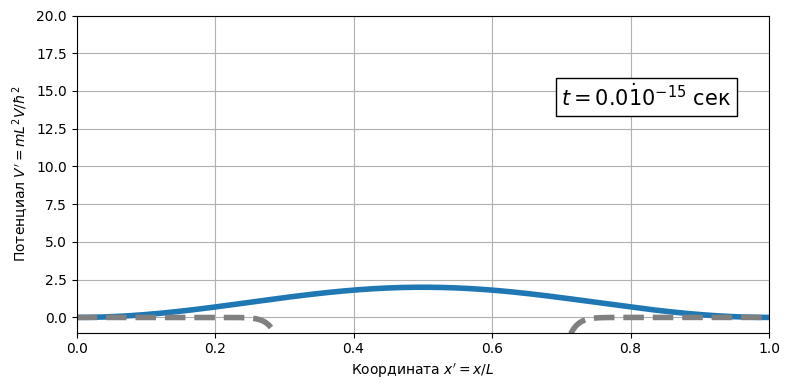

: 

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
func, = plt.plot([], [], linewidth=4)
time_text = ax.text(0.7, 16, '', fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))
real_time_text = ax.text(0.7, 14, '', fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))

ax.set_ylim(-1, 20)
ax.set_xlim(0, 1)
#ax.set_ylim(-0.5, 2)
#ax.set_xlim(0.4, 0.6)
#ax.set_ylabel('$|\psi (x)|^2$', fontsize=20)
#ax.set_xlabel('x/L', fontsize=20)
#ax.legend(loc='upper left')
#ax.set_title('$(mL^2)V(x) = -10^4 \cdot n(x, \mu=L/2, \sigma=L/20)$')
plt.plot(x, potential(x), 'b--', color='gray', linewidth=4)
#plt.xticks((0, 1))
#plt.yticks((0, 1))
plt.xlabel("Координата $х'=x/L$")
plt.ylabel("Потенциал $V'=mL^2V/\hbar^2$")
plt.grid()
plt.tight_layout()
anim = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
anim.save('Schrodinger_animation.gif', writer='pillow', fps=50, dpi=100)
#HTML(anim.to_html5_video())